In [17]:
import numpy as np
import os 
import cv2 
import time 
import argparse
import multiprocessing
import tensorflow as tf
from matplotlib import pyplot as plt
import sys
import six.moves.urllib as urllib
import tarfile
from PIL import Image


In [18]:
sys.path.append("/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/")
sys.path.append("..")


In [19]:
%matplotlib inline 
from utils import label_map_util
from utils import visualization_utils as vis_util

In [20]:
detection_graph =tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile("/Users/rohinisharma/software/ssd_mobilenet_v1_coco_11_06_2017/frozen_inference_graph.pb", 
                        'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def,name='')
        

In [21]:
NUM_CLASSES=90
label_map = label_map_util.load_labelmap("/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/data/mscoco_label_map.pbtxt")
categories = label_map_util.convert_label_map_to_categories(label_map, 
                                                            max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [22]:
def load_image_into_numpy_array(image):
    (im_width,im_height) = image.size
    return np.array(image.getdata()).reshape(
    (im_height,im_width,3)).astype(np.uint8)

In [23]:
PATH_TO_TEST_IMAGES_DIR = '/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/test_images'
test_image_paths = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) 
                    for i in range(1,5)]
print(test_image_paths)
image_size = (12,8)

['/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/test_images/image1.jpg', '/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/test_images/image2.jpg', '/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/test_images/image3.jpg', '/Users/rohinisharma/anaconda/lib/python2.7/site-packages/tensorflow/models/research/object_detection/test_images/image4.jpg']


In [15]:
cap_stream = cv2.VideoCapture(0)
while(cap_stream.isOpened()):
    ret, frame = cap_stream.read()
    if cv2.waitKey(1) & 0xFF == ord('q'):
                break
cap_stream.release()

KeyboardInterrupt: 

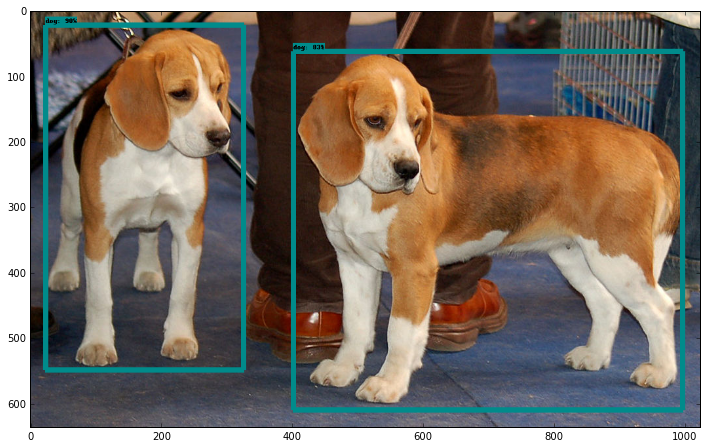

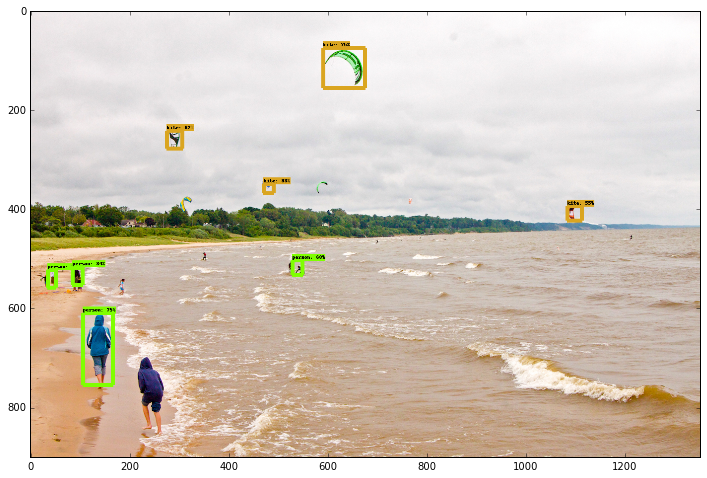

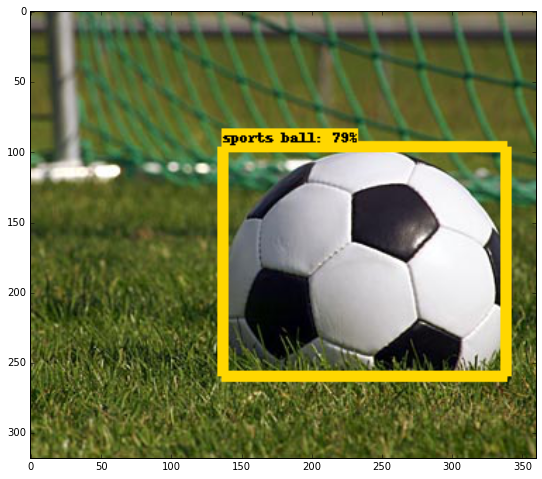

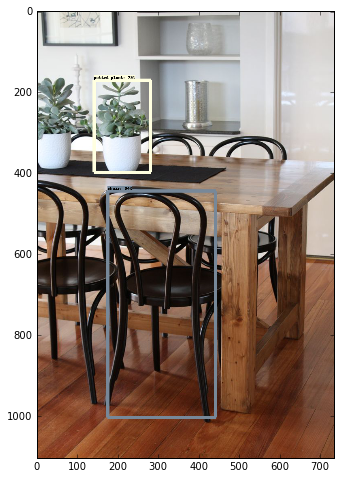

In [25]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        #input and output tensors for detection_graph
        image_tensor=detection_graph.get_tensor_by_name("image_tensor:0")
        detection_boxes = detection_graph.get_tensor_by_name("detection_boxes:0")
        detection_scores = detection_graph.get_tensor_by_name("detection_scores:0")
        detection_classes = detection_graph.get_tensor_by_name("detection_classes:0")
        num_detections = detection_graph.get_tensor_by_name("num_detections:0")
        for image_path in test_image_paths :
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np,axis=0)
            (boxes,scores,classes,num)= sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
            plt.figure(figsize=image_size)
            plt.imshow(image_np)
            #cv2.imshow('Video',frame)
            